In [25]:
import pandas as pd
import tabula as tb
import seaborn as sns

import matplotlib.pylab as plt
import matplotlib.ticker as ticker

from datetime import datetime, timedelta
sns.set(rc={"figure.dpi": 200, 'savefig.dpi': 200})
sns.set_context('notebook')
sns.set_style("ticks")


In [18]:
def getPDFpath(year,month,day):
    #For some weird reason the filenames seem to change from day to day among these four
    bp = [
        "https://www.nicd.ac.za/wp-content/uploads/YEAR/MM/NICD-COVID-19-Daily-Sentinel-Hospital-Surveillance-report-National-YEARMMDD.pdf" ,
        "https://www.nicd.ac.za/wp-content/uploads/YEAR/MM/Datcov-National-Report-YEARMMDD.pdf",
        "https://www.nicd.ac.za/wp-content/uploads/YEAR/MM/Datcov19_National_Export-YEARMMDD.pdf",
        "https://www.nicd.ac.za/wp-content/uploads/YEAR/MM/Datcov19_National_Export-YEARMMDD.pdf",
        "https://www.nicd.ac.za/wp-content/uploads/YEAR/MM/DATCOV-National-Report-YEARMMDD.pdf"
    ]

    for i in range(len(bp)):
        bp[i] = bp[i].replace("YEAR", str(year), 2)
        bp[i] = bp[i].replace("MM", "%02d" % month, 2)
        bp[i] = bp[i].replace("DD", "%02d" % day)

    return bp
    


def getTableFromPDF(year, month, day, sector = 'private'):
    #these are the coords of the table we want to extract
    #for the "all" component, we need to divide between public and private sector but the tabling is not really straightforward
    boxes = { 'private' : {
                                'pages' : [5],
                                'boxPts' : [v * 28.28 for v in [3.3,0,10.1,25]]
                            },
             
              'all' : {
                          
                                'pages' : [2],
                                'boxPts' : [v * 28.28 for v in [16,0,27,25]]
              }
            }

    fnames = getPDFpath(year,month,day)
    
    pages = boxes[sector]['pages']
    box = boxes[sector]['boxPts']
    
    for f in fnames:
        #try:
        df = tb.read_pdf(f, pages=pages, area=[box] )
        print ("fetched %s" % f)
        #df[1]['Date'] = "%s/%02d/%02d" % (year,month,day)

        #return df[1]
        return df

        #except:
        #    pass
    
    print ('No file available for %s/%02d/%02d' % (year,month,day))



In [3]:
#fetch all data from November 1 to December 8

start_date = datetime(2021,11,1)
end_date = datetime(2021,12,8)
delta = timedelta(days=1)

temp_dt = []
while start_date <= end_date:
    temp_dt.append(getTableFromPDF(year=start_date.year, month=start_date.month, day=start_date.day))
    start_date += delta

fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/NICD-COVID-19-Daily-Sentinel-Hospital-Surveillance-report-National-20211101.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/Datcov19_National_Export-20211102.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/Datcov19_National_Export-20211103.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/NICD-COVID-19-Daily-Sentinel-Hospital-Surveillance-report-National-20211104.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/Datcov19_National_Export-20211105.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/Datcov19_National_Export-20211105.pdf
No file available for 2021/11/05
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/NICD-COVID-19-Daily-Sentinel-Hospital-Surveillance-report-National-20211106.pdf
fetched https://www.nicd.ac.za/wp-content/uploads/2021/11/NICD-COVID-19-Daily-Sentinel-Hospital-Surveillance-report-National-20211107.pdf
fetched https://www.nicd.ac.za/

In [4]:
dt = pd.concat(temp_dt, ignore_index=True)
dt.columns = dt.columns.str.replace('\r',' ')
dt.columns = dt.columns.str.replace(' ','')

In [5]:
dt

,Province,Facilities Reporting,Admissions to Date,Died to Date,Discharged to date,Currently Admitted,Currently in ICU,Currently Ventilated,Currently Oxygenated,Admissions in Previous Day,...,9918,55,8,5,5.1,0,Unnamed: 0,Unnamed: 1,Unnamed: 2,Currently Admitted 
0,Eastern Cape,18,13184.0,3172.0,9876.0,65.0,12.0,4.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Free State,20,11940.0,2117.0,9581.0,72.0,20.0,11.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gauteng,94,72541.0,13670.0,57221.0,1052.0,193.0,90.0,60.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KwaZulu-Natal,47,37387.0,6878.0,29759.0,341.0,73.0,27.0,51.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Limpopo,7,7626.0,1637.0,5827.0,26.0,2.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Limpopo,7,7761.0,1638.0,5944.0,43.0,2.0,0.0,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,Mpumalanga,9,9761.0,1601.0,8010.0,68.0,3.0,2.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,North West,13,10971.0,1615.0,8859.0,65.0,11.0,7.0,9.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,Northern Cape,6,4781.0,800.0,3730.0,15.0,2.0,3.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


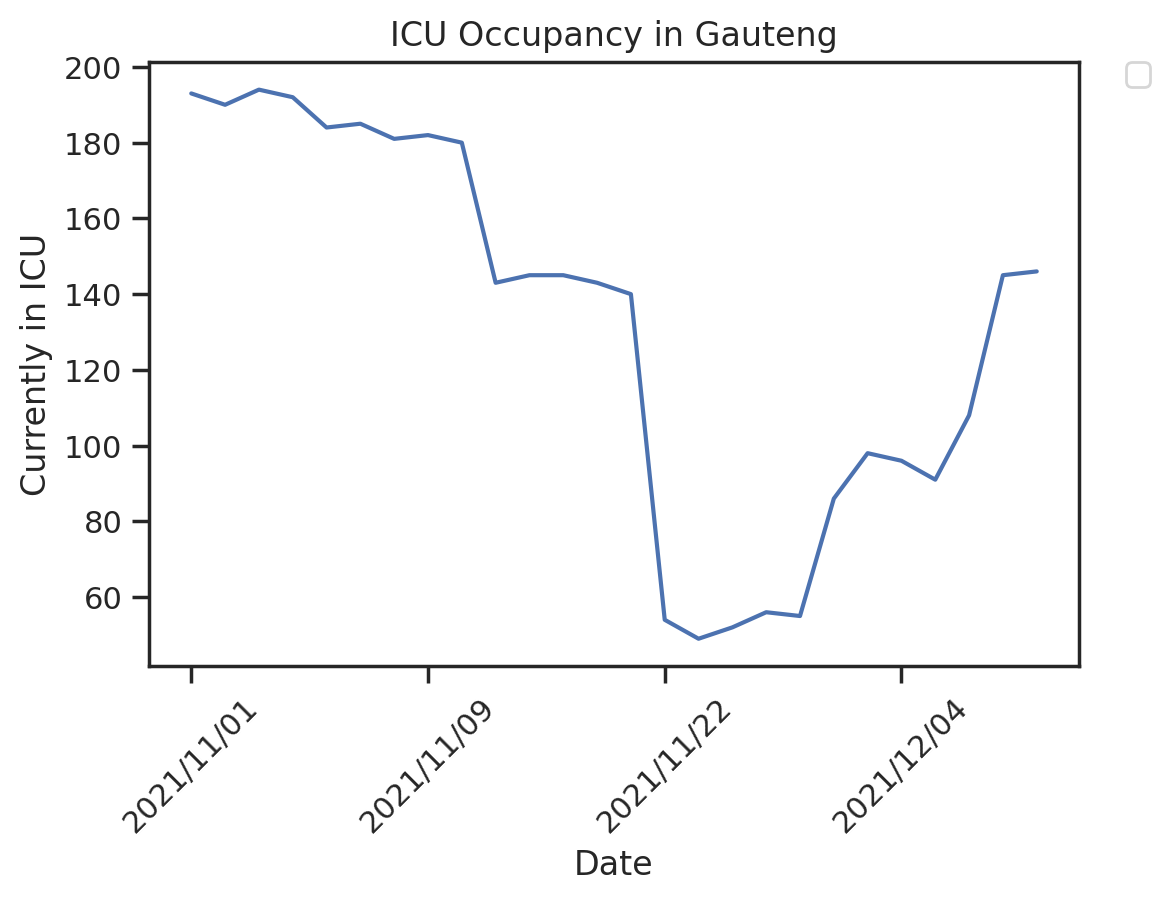

In [29]:
sns.lineplot(data=dt[dt.Province=='Gauteng'], x='Date', y='Currently in ICU')
ax = plt.gca()

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('ICU Occupancy in Gauteng')

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=7))
plt.show()


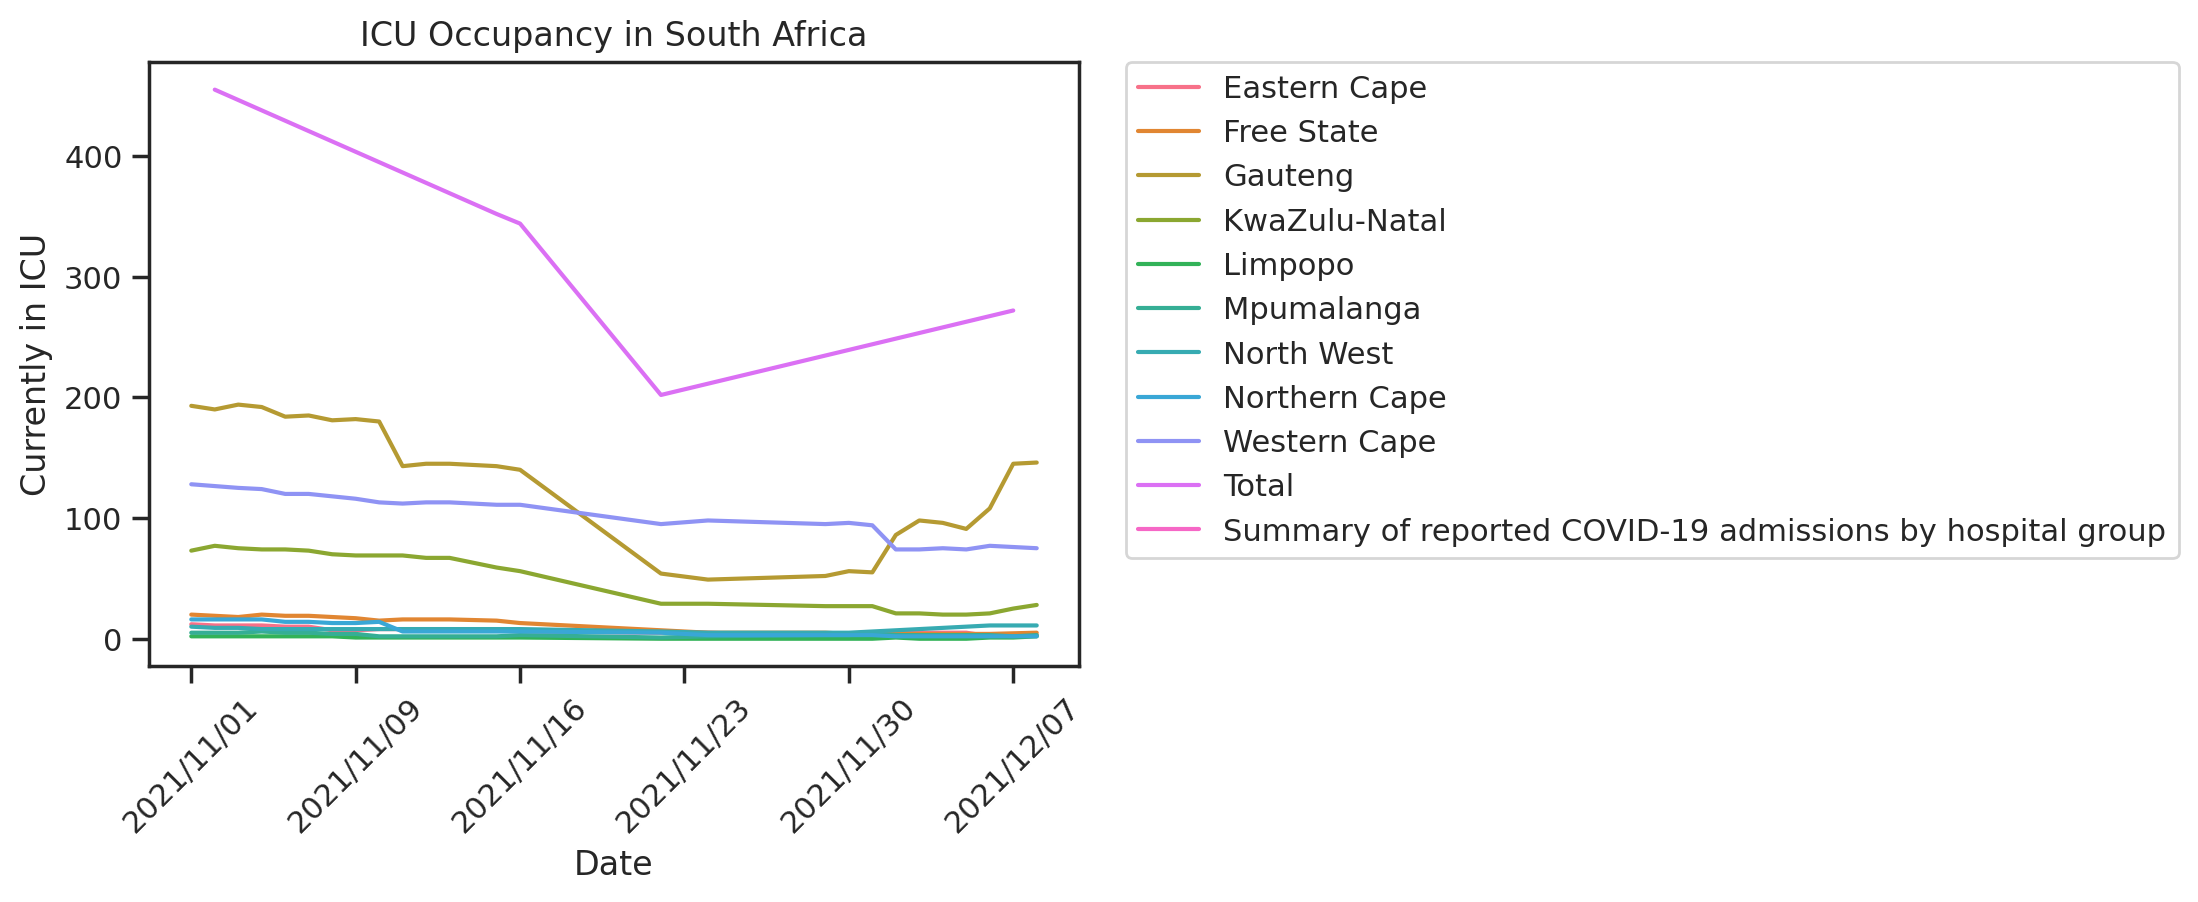

In [28]:
sns.lineplot(data=dt, x='Date', y='Currently in ICU', hue="Province", estimator=None)
ax = plt.gca()

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('ICU Occupancy in South Africa')

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=7))
plt.show()

In [9]:
dt.to_csv("south_africa_covid_from_November_1_private.csv")